In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time
df = pd.read_csv('OnlineRetailShopGermany.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


False
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Percentage')]

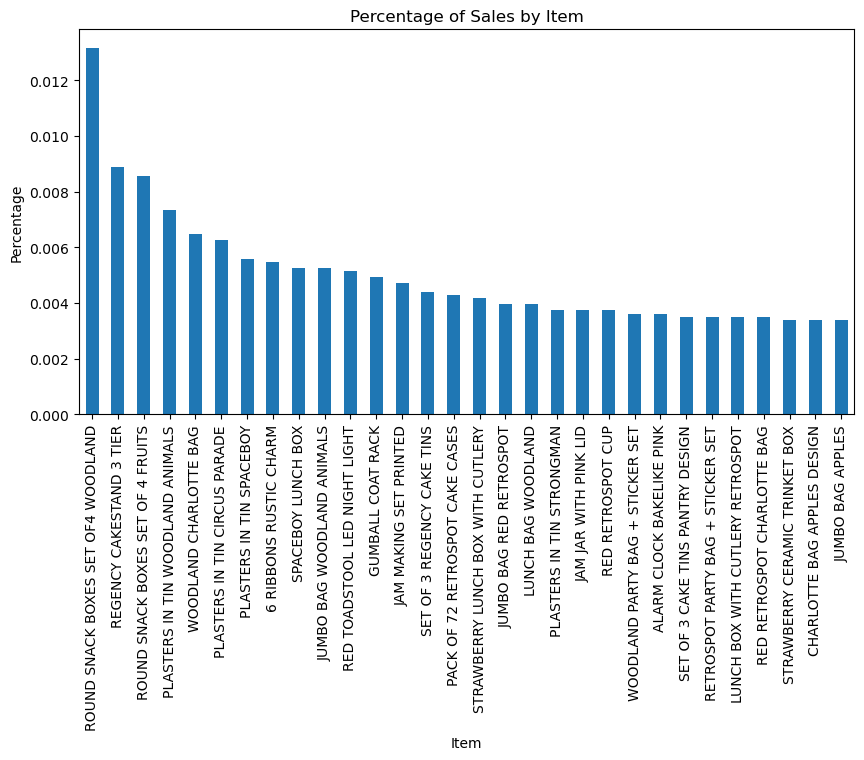

In [2]:
print (df.isnull().values.any())
missing_value = ["NaN", "NONE", "None", "nan", "none", "n/a", "na", " "]
df = pd.read_csv('OnlineRetailShopGermany.csv', na_values = missing_value)
print (df.isnull().sum())
df['Description'] = df['Description'].str.strip()
# ranking the top 10 best-selling items
df.Description.value_counts(normalize=True)[:10]
df.drop(df[df['Description'] == 'POSTAGE'].index, inplace = True)
df.shape
df.Description.value_counts(normalize=True)[:30].plot(kind="bar", figsize=(10,5), title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

C:\Users\My PC\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.106961,0.089983,0.052632,0.492063,5.468404,0.043007,1.791596,0.915001
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.089983,0.106961,0.052632,0.584906,5.468404,0.043007,2.151412,0.897930
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.089983,0.190153,0.044143,0.490566,2.579852,0.027032,1.589700,0.672933
4,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.083192,0.106961,0.047538,0.571429,5.342404,0.038640,2.083758,0.886574
5,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.106961,0.083192,0.047538,0.444444,5.342404,0.038640,1.650255,0.910171
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.190153,0.106961,0.057725,0.303571,2.838152,0.037386,1.282312,0.799729
7,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.106961,0.190153,0.057725,0.539683,2.838152,0.037386,1.759323,0.725229
8,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.098472,0.054329,0.045840,0.465517,8.568427,0.040490,1.769319,0.979773
9,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.054329,0.098472,0.045840,0.843750,8.568427,0.040490,5.769779,0.934038
10,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.122241,0.190153,0.101868,0.833333,4.382440,0.078623,4.859083,0.879304


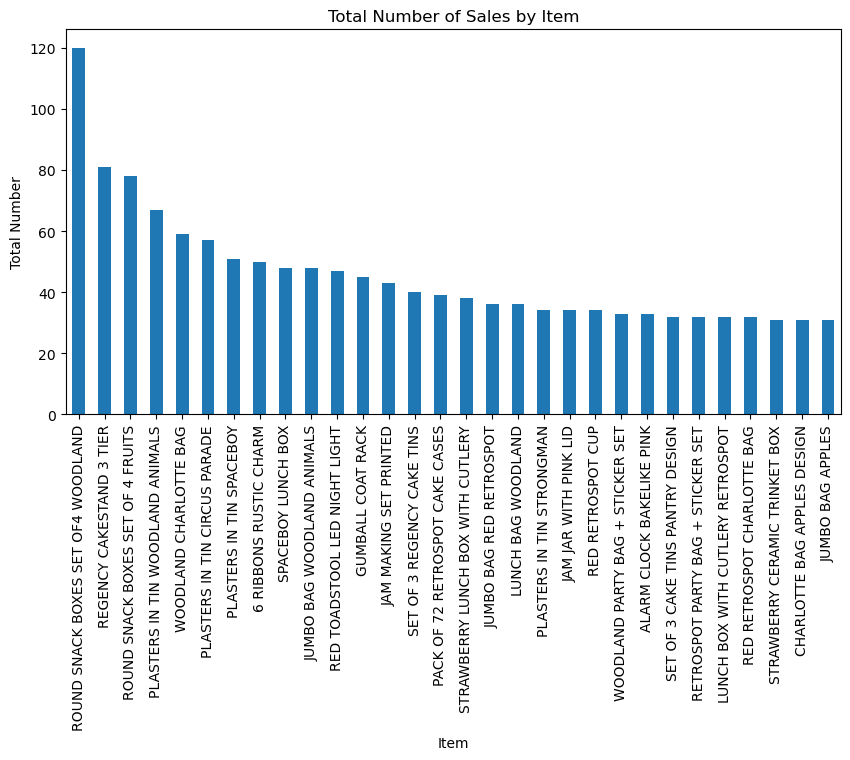

In [3]:
# create a bar chart, rank by value
df.Description.value_counts()[:30].plot(kind="bar", figsize=(10,5), title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")
df2 = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
def convertToZeroOne(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df3 = df2.applymap(convertToZeroOne)
start_time = time.time()
frequent_itemsets = apriori(df3, min_support=0.04, use_colnames=True)
end_time = time.time()
frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
#Filtering rules based on condition
rules[(rules['lift'] >= 0.5) & (rules['confidence'] >= 0.3)]

C:\Users\My PC\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\My PC\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


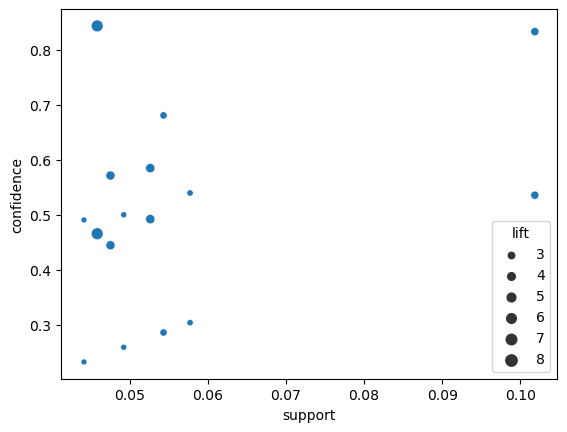

0.015003681182861328


In [4]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt


# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()
print(end_time-start_time)